In [45]:
from tensorflow.test import is_built_with_cuda
from tensorflow.config import list_physical_devices
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(is_built_with_cuda())
print(f"GPUs Available: {list_physical_devices('GPU')}")

True
GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [51]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

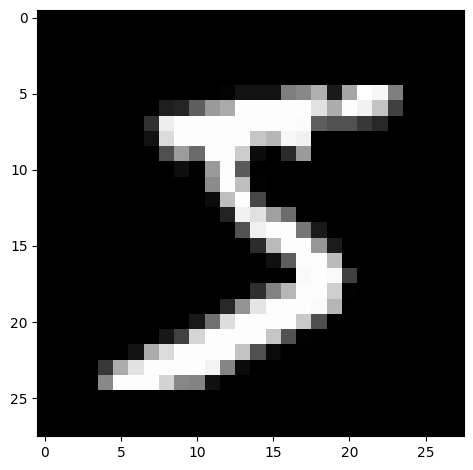

In [52]:
plt.imshow(X_train_full[0], cmap='gray')
plt.tight_layout()

In [53]:
y_train_full[0]

5

In [54]:
X_train_full.shape

(60000, 28, 28)

In [55]:
X_train_full.dtype

dtype('uint8')

In [56]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# y_valid = keras.utils.to_categorical(y_valid, num_classes=10)
# y_train = keras.utils.to_categorical(y_train, num_classes=10)

In [57]:
y_valid[0]

5

In [58]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=24, kernel_size=5, padding='valid', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # output layer
])

In [59]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4572 - accuracy: 0.8766 - val_loss: 0.2199 - val_accuracy: 0.9370

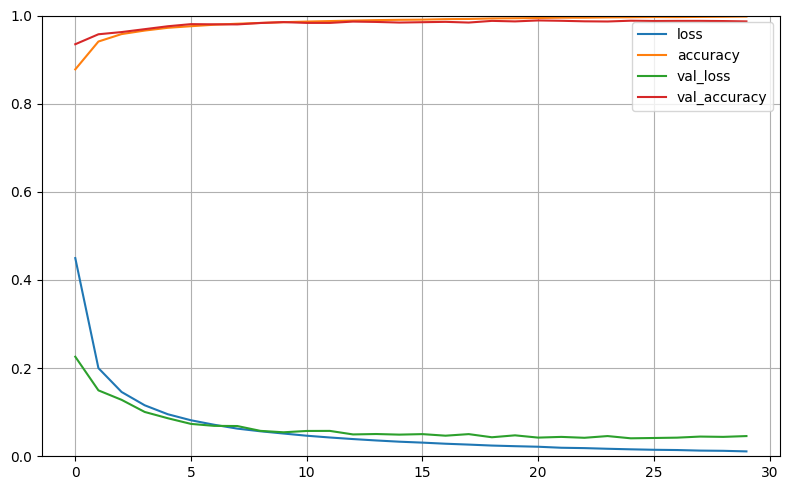

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.tight_layout()
plt.show()

In [49]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 5ms/step - loss: 0.0458 - accuracy: 0.9866

[0.04584486782550812, 0.9865999817848206]